In [1]:
import pandas as pd
year18 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2018 - QB.csv")
year19 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2019 - QB.csv")
year21 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2021 - QB.csv")
year22 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2022 - QB.csv")
columns = ['CMP', 'ATT', 'YDS', 'PCT', 'YPA', 'SACK', 'TD', 'INT', 'RATING',
                                    'AGE',
                                    'SPEED', 'ACCELERATION', 'STRENGTH', 'AWARENESS',
                                    'AGILITY', 'CATCH', 'JUMP', 'THROW POWER', 'THROW ACC', 'BREAK TACKLE', 'TACKLE', 'TOUGHNESS', 'PLAYER EGO', 'WGT', 'HGTIN',
                                    'POCKET PASSER', 'SCRAMBLER','BALANCED','CANNON ARM','CAPTAIN COMEBACK','FRANCHISE QB','GAME MANAGER','NFL ICON','PRECISION PASSER',
                                    'TEAM LEADER','TEAM MENTOR','NONE']

rawData = [year18,year19,year21,year22]
dfs = []
for rd in rawData:
    df = pd.DataFrame(rd,columns=columns)
    df = df.dropna(subset=['ATT'])
    df = df[~(df['ATT'] <= 100)]
    df['HGTIN'] = df['HGTIN'].astype(float)
    dfs.append(df)
all_years = pd.concat(dfs)
correlation_matrix = all_years.corr()
correlation_matrix.to_clipboard()

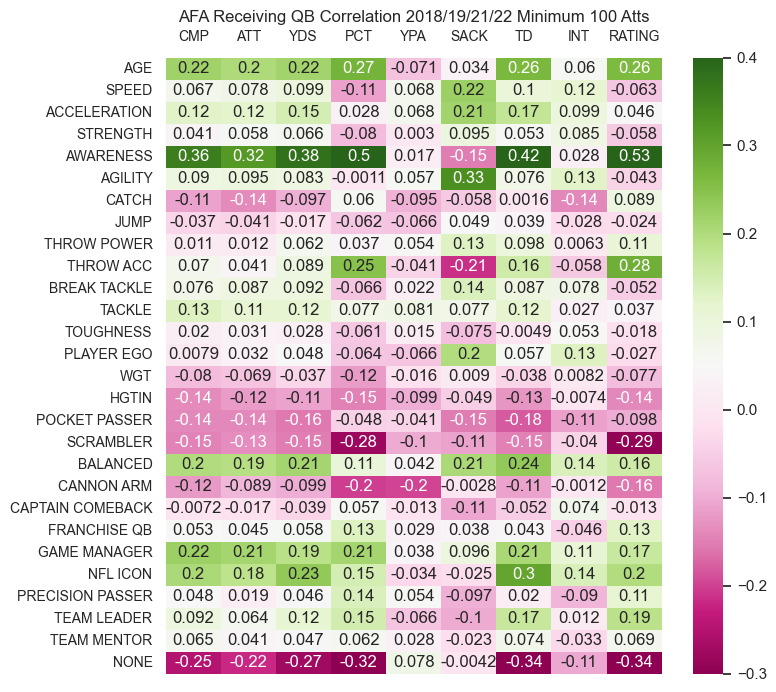

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
rows = ['AGE',
                                    'SPEED', 'ACCELERATION', 'STRENGTH', 'AWARENESS',
                                    'AGILITY', 'CATCH', 'JUMP', 'THROW POWER', 'THROW ACC', 'BREAK TACKLE', 'TACKLE', 'TOUGHNESS', 'PLAYER EGO', 'WGT', 'HGTIN',
                                    'POCKET PASSER', 'SCRAMBLER','BALANCED','CANNON ARM','CAPTAIN COMEBACK','FRANCHISE QB','GAME MANAGER','NFL ICON','PRECISION PASSER',
                                    'TEAM LEADER','TEAM MENTOR','NONE']
cols = ['CMP', 'ATT', 'YDS', 'PCT', 'YPA', 'SACK', 'TD', 'INT', 'RATING']
sns.set(rc={'figure.facecolor':'lightgrey'})
sns.heatmap(correlation_matrix.loc[rows,cols], annot=True, cmap='PiYG', vmin=-.3,vmax=.4)
plt.title("AFA Receiving QB Correlation 2018/19/21/22 Minimum 100 Atts")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom = False, top = False, labeltop = True)
plt.show()